# 小红书销售额预测

## 课题背景

小红书是一个生活方式平台和消费决策入口，是当前著名的电商平台。和其他电商平台不同，小红书是从社区起家。在小红书社区，用户通过文字、图片、视频笔记的分享，记录了这个时代年轻人的正能量和美好生活，小红书通过机器学习对海量信息和人进行精准、高效匹配。

2014年10月小红书福利社上线，旨在解决海外购物的另一个难题：买不到。小红书已累积的海外购物数据，分析出最受欢迎的商品及全球购物趋势，并在此基础上把全世界的好东西，以最短的路径、最简洁的方式提供给用户。

## 问题
基于所给数据，利用Python数据进线性回归，对小红书的销售额进行预测。

# 代码实现

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [72]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [79]:
from sklearn.model_selection import train_test_split,KFold

In [2]:
df = pd.read_csv('./data/小红书数据.csv')

## 数据清洗

In [3]:
df.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


- revenue为购买金额，目标列
- engaged_last_30 最近30天 是否有参加重点活动
- liefecycle 生命周期， ABC分别对应注册0.5，1,2年
- days_since_last_order 距离上次下单时间，单位 天
- previous_order_amount 累计消费金额
- 3rd_party_stores 从第三方商家购买的商品数量

In [4]:
df.shape

(29452, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     17723 non-null float64
age                        16716 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

age                        0.432432
engaged_last_30            0.398241
gender                     0.398241
3rd_party_stores           0.000000
previous_order_amount      0.000000
 days_since_last_order     0.000000
lifecycle                  0.000000
revenue                    0.000000
dtype: float64

In [12]:
df.describe(include='all')

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,16716.000000,17723.000000,29452,29452.000000,29452.000000,29452.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,20201,NaN,NaN,NaN
mean,398.288037,0.950742,60.397404,0.073069,NaN,7.711348,2348.904830,2.286059
std,960.251728,0.216412,14.823026,0.260257,NaN,6.489289,2379.774213,3.538219
min,0.020000,0.000000,18.000000,0.000000,NaN,0.130000,0.000000,0.000000
25%,74.970000,1.000000,50.000000,0.000000,NaN,2.190000,773.506250,0.000000
50%,175.980000,1.000000,60.000000,0.000000,NaN,5.970000,1655.980000,0.000000
75%,499.990000,1.000000,70.000000,0.000000,NaN,11.740000,3096.766500,3.000000


In [13]:
df['engaged_last_30'].unique()

array([ 0., nan,  1.])

### 更正特征数据类型

In [63]:
df_clean = df.copy()
df_clean['gender'] = df_clean['gender'].astype(str)
df_clean['engaged_last_30'] = df_clean['engaged_last_30'].astype(str)

### 处理缺失值

对于`engaged_last_30`列，我们可以用`0`来填充缺失值，另外两列则保留缺失值。

In [64]:
df_clean['engaged_last_30'] = df_clean['engaged_last_30'].replace('nan','0.0')

### 格式化列名

In [65]:
df_clean = df_clean.rename(columns=lambda x: x.strip())

## EDA

### 目标列

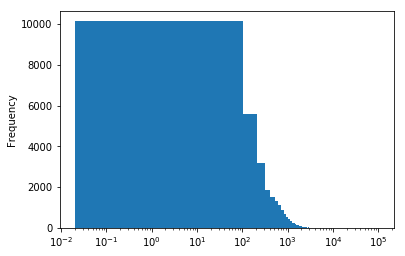

In [29]:
df_clean.revenue.plot(kind='hist',logx=True,bins=1000);

消费额差异较大，需要做平滑处理。

### 性别

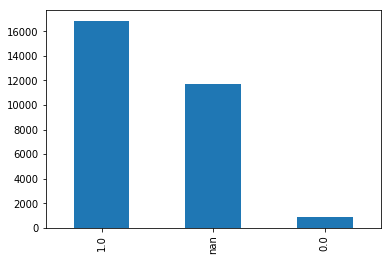

In [31]:
df_clean['gender'].value_counts().plot(kind='bar');

性别列为无次序分类变量，可以做One-Hot Encode处理

### 年龄

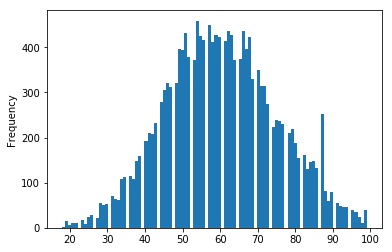

In [34]:
df_clean['age'].plot(kind='hist',bins=100);

### 用户行为特征

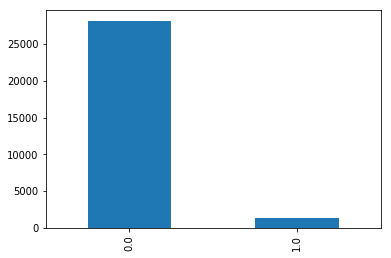

In [35]:
df_clean['engaged_last_30'].value_counts().plot(kind='bar');

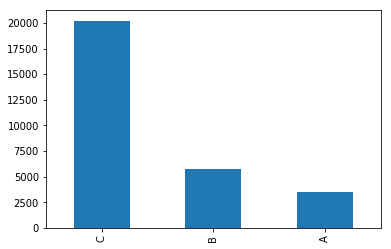

In [36]:
df_clean['lifecycle'].value_counts().plot(kind='bar');

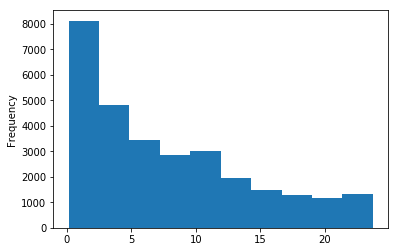

In [42]:
df_clean['days_since_last_order'].plot(kind='hist');

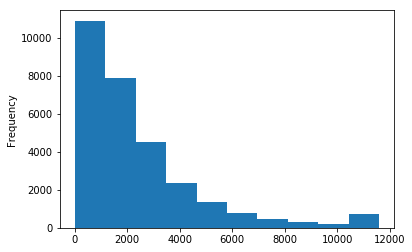

In [44]:
df_clean['previous_order_amount'].plot(kind='hist');

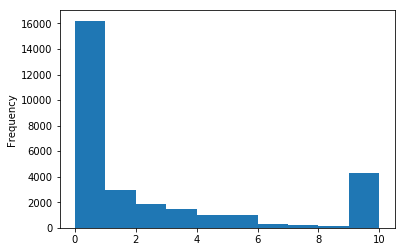

In [48]:
df_clean['3rd_party_stores'].plot(kind='hist');

## 特征工程

In [77]:
df_clean.head()

,revenue,age,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_nan,engaged_last_30_0.0,engaged_last_30_1.0
0,0.371642,0.506173,1,0.175148,0.202094,0,0,1,0,1,0
1,0.458777,0.407407,0,0.034351,0.736329,0,0,1,0,1,0
2,0.368051,0.753086,2,0.176421,0.145513,1,0,1,0,1,0
3,0.560300,NaN,2,0.626378,0.301679,0,0,0,1,1,0
4,0.383268,NaN,2,0.890585,0.342173,4,0,0,1,1,0


In [67]:
df_clean['revenue'] = np.log1p(df_clean['revenue'])

In [69]:
df_clean = df_clean.join(pd.get_dummies(df_clean[['gender','engaged_last_30']])).drop(['gender','engaged_last_30'],axis=1)

In [74]:
encoder = LabelEncoder()
df_clean['lifecycle'] = encoder.fit_transform(df_clean['lifecycle'])

In [76]:
scaler = MinMaxScaler()
numerical_features = ['revenue','age','days_since_last_order','previous_order_amount']
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

## 训练

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [97]:
df_clean['age'] = df_clean['age'].fillna(-1)

In [98]:
y = df_clean['revenue']
X = df_clean.drop('revenue',axis=1)

In [99]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [100]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
mean_squared_error(y_test,lr.predict(x_test))

0.0106261602080177

In [107]:
mean_squared_error(np.expm1(y_test),np.expm1(lr.predict(x_test)))

0.026896419285257944

In [108]:
lr.coef_

array([-0.02810159, -0.00456276,  0.06483217,  0.10255217, -0.00181211,
        0.00302498,  0.01519655, -0.01822152, -0.00920984,  0.00920984])

In [109]:
lr.intercept_

0.4264576088670842

最终可以实现均方误差约为0.027的预测。